In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc,f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
train=pd.read_csv("train_LZdllcl.csv")

In [15]:
test=pd.read_csv("test_2umaH9m.csv")

In [16]:
submission=pd.read_csv("sample_submission_M0L0uXE.csv")

In [17]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [19]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [20]:
train.shape,test.shape,submission.shape

((54808, 14), (23490, 13), (23490, 2))

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [22]:
    #train['region'].replace(['region_1','region_2','region_3','region_4','region_5','region_6','region_7','region_8','region_9','region_10'],'region 1-10',inplace=True)
    #train['region'].replace(['region_11','region_12','region_13','region_14','region_15','region_16','region_17','region_18','region_19','region_20'],'region 11-20',inplace=True)
    #train['region'].replace(['region_21','region_22','region_23','region_24','region_25','region_26','region_27','region_28','region_29','region_30'],'region 21-30',inplace=True)
    #train['region'].replace(['region_31','region_32','region_33','region_34'],'region 31-34',inplace=True)

In [23]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [24]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [26]:
cat_cols=['recruitment_channel','education','department','region','gender']
int_cols=['no_of_trainings','previous_year_rating','length_of_service','age','KPIs_met >80%','awards_won?','avg_training_score']

In [27]:
#train['previous_year_rating'].fillna(0, inplace = True)
#train['education'].fillna(train['education'].mode()[0], inplace = True)

In [41]:
cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])



# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(fill_value=0)), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [58]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,int_cols)
    ]
)

# integrate preprocessing and model

model = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])


In [60]:
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['recruitment_channel',
                                                   'education', 'department',
                                                   'region', 'gender']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings',
                                                   'previous_year_rating',
                                                   'length_of_service', 'age',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [61]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [62]:
y = train[tgt_col]

In [63]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [82]:
over_sampling = RandomOverSampler()

In [83]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [84]:
under_sampling = RandomUnderSampler()

In [85]:
train_scaled_under_sample_X, train_y_scaled_under_sample =  under_sampling.fit_resample(train_X, train_y)

In [107]:
def model_pred_result(train_X, test_X, train_y, test_y, model):
    #model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train F1_Score : ",f1_score(train_y, train_pred))
    print("Test F1_Score : ",f1_score(test_y, test_pred))
    print("Train Report : \n",classification_report(train_y, train_pred))
    print("Test Report : \n",classification_report(test_y, test_pred))
    print("Train Confusion. Matrix : \n",confusion_matrix(train_y, train_pred))
    print("Test Confusion. Matrix  : \n",confusion_matrix(test_y, test_pred))  

    
    return f1_score(train_y, train_pred), f1_score(test_y, test_pred)

In [99]:
params_1 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]

In [100]:
grid_1 = GridSearchCV(estimator=model, param_grid=params_1, 
                    cv=2, scoring='f1')

In [101]:
grid_1.fit(train_X_os, train_y_os)

C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarn

C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.

C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.

C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97

C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['recruitment_channel',
                                                                          'education',
                                                                          'department',
                                                                          'region',
                                                                          'gender']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='f1')

In [102]:
grid_1.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                ['sclf2', GradientBoostingClassifier()],
                                ['sclf3', AdaBoostClassifier()]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 15,
 'model__sclf3__n_estimators': 5}

In [103]:
grid_1.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['recruitment_channel',
                                                   'education', 'department',
                                                   'region', 'gender']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('scale',
                                                                   Stan...,
                                                  ['no_of_trainings',
                                                   'previous_year_rating',
                                                   'length_of_service', 'age',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=15)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [105]:
new_model_1 = grid_1.best_estimator_

In [108]:
model_pred_result(train_X,val_X,train_y,val_y,new_model_1)

Train Accuracy :  0.7282534324681841
Test Accuracy :  0.7212187557015143
Train F1_Score :  0.35043340783950283
Test F1_Score :  0.3265755839576906
Train Report : 
               precision    recall  f1-score   support

           0       0.98      0.72      0.83     40086
           1       0.22      0.85      0.35      3760

    accuracy                           0.73     43846
   macro avg       0.60      0.79      0.59     43846
weighted avg       0.92      0.73      0.79     43846

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.71      0.82     10054
           1       0.20      0.82      0.33       908

    accuracy                           0.72     10962
   macro avg       0.59      0.76      0.58     10962
weighted avg       0.91      0.72      0.78     10962

Train Confusion. Matrix : 
 [[28717 11369]
 [  546  3214]]
Test Confusion. Matrix  : 
 [[7165 2889]
 [ 167  741]]


(0.35043340783950283, 0.3265755839576906)

In [ ]:
params_1 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]

In [109]:
params = [
    {
    'model': [RandomForestClassifier()],
    'model__max_depth':[20,25],
    'model__n_estimators':[200,225]
    }    
]

In [110]:
grid = GridSearchCV(estimator=model, param_grid=params, 
                    cv=2, scoring='f1')

In [111]:
grid.fit(train_X_os, train_y_os)

C:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['recruitment_channel',
                                                                          'education',
                                                                          'department',
                                                                          'region',
                                                                          'gender']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(fill_value=0)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'age',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__max_depth': [20, 25],
                          'model__n_estimators': [200, 225]}],
             scoring='f1')

In [112]:
grid.best_params_

{'model': RandomForestClassifier(),
 'model__max_depth': 25,
 'model__n_estimators': 225}

In [113]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['recruitment_channel',
                                                   'education', 'department',
                                                   'region', 'gender']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings',
                                                   'previous_year_rating',
                                                   'length_of_service', 'age',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 RandomForestClassifier(max_depth=25, n_estimators=225))])

In [114]:
new_model = grid.best_estimator_

In [115]:
model_pred_result(train_X,val_X,train_y,val_y,new_model)

Train Accuracy :  0.9692788395748757
Test Accuracy :  0.8870644043057836
Train F1_Score :  0.8480198578359472
Test F1_Score :  0.42791127541589646
Train Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     40086
           1       0.74      1.00      0.85      3760

    accuracy                           0.97     43846
   macro avg       0.87      0.98      0.92     43846
weighted avg       0.98      0.97      0.97     43846

Test Report : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     10054
           1       0.37      0.51      0.43       908

    accuracy                           0.89     10962
   macro avg       0.66      0.72      0.68     10962
weighted avg       0.91      0.89      0.90     10962

Train Confusion. Matrix : 
 [[38741  1345]
 [    2  3758]]
Test Confusion. Matrix  : 
 [[9261  793]
 [ 445  463]]


(0.8480198578359472, 0.42791127541589646)

In [116]:
# updating the existing target values with predicted values
submission['is_promoted'] = new_model.predict(test)
submission.to_csv('sub_pipeline.csv',index=False)

In [118]:
import joblib

In [119]:
joblib.dump(model,'HR_promotion_Analytics_pipeline_model.pkl')

['HR_promotion_Analytics_pipeline_model.pkl']

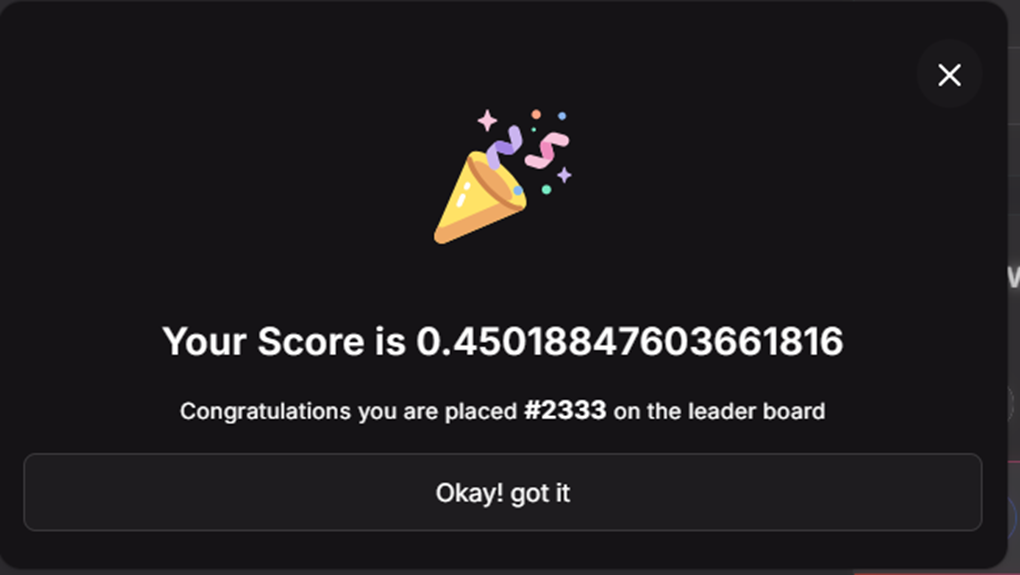

# FASTAPI in terminal

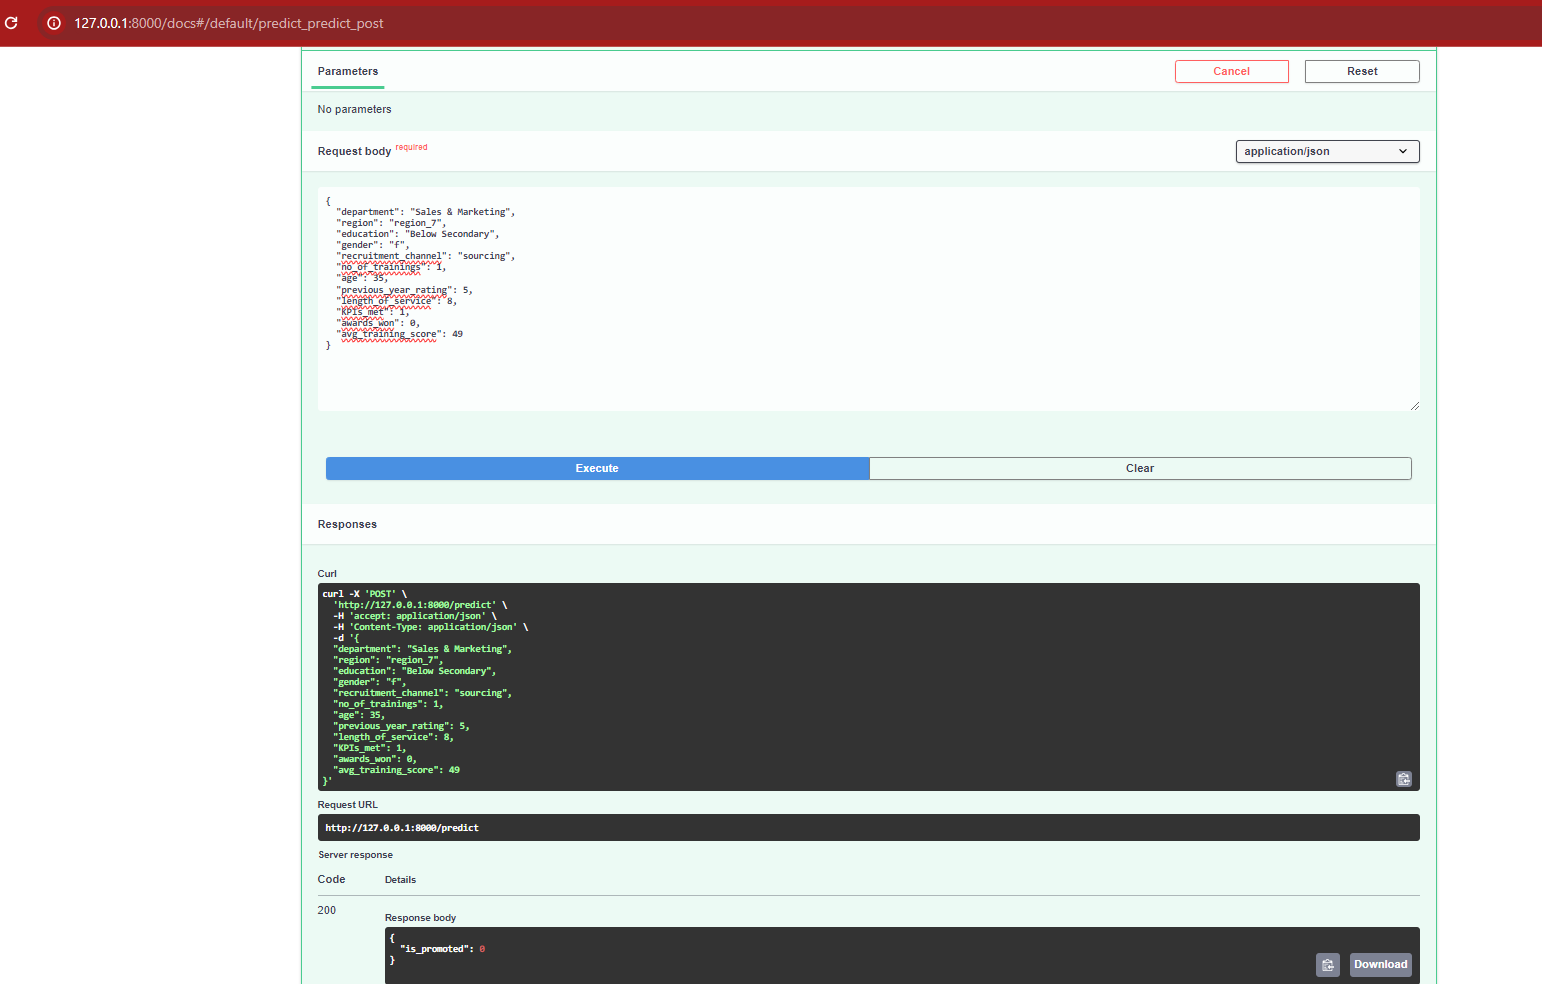

# STREAMLI Result vie terminal

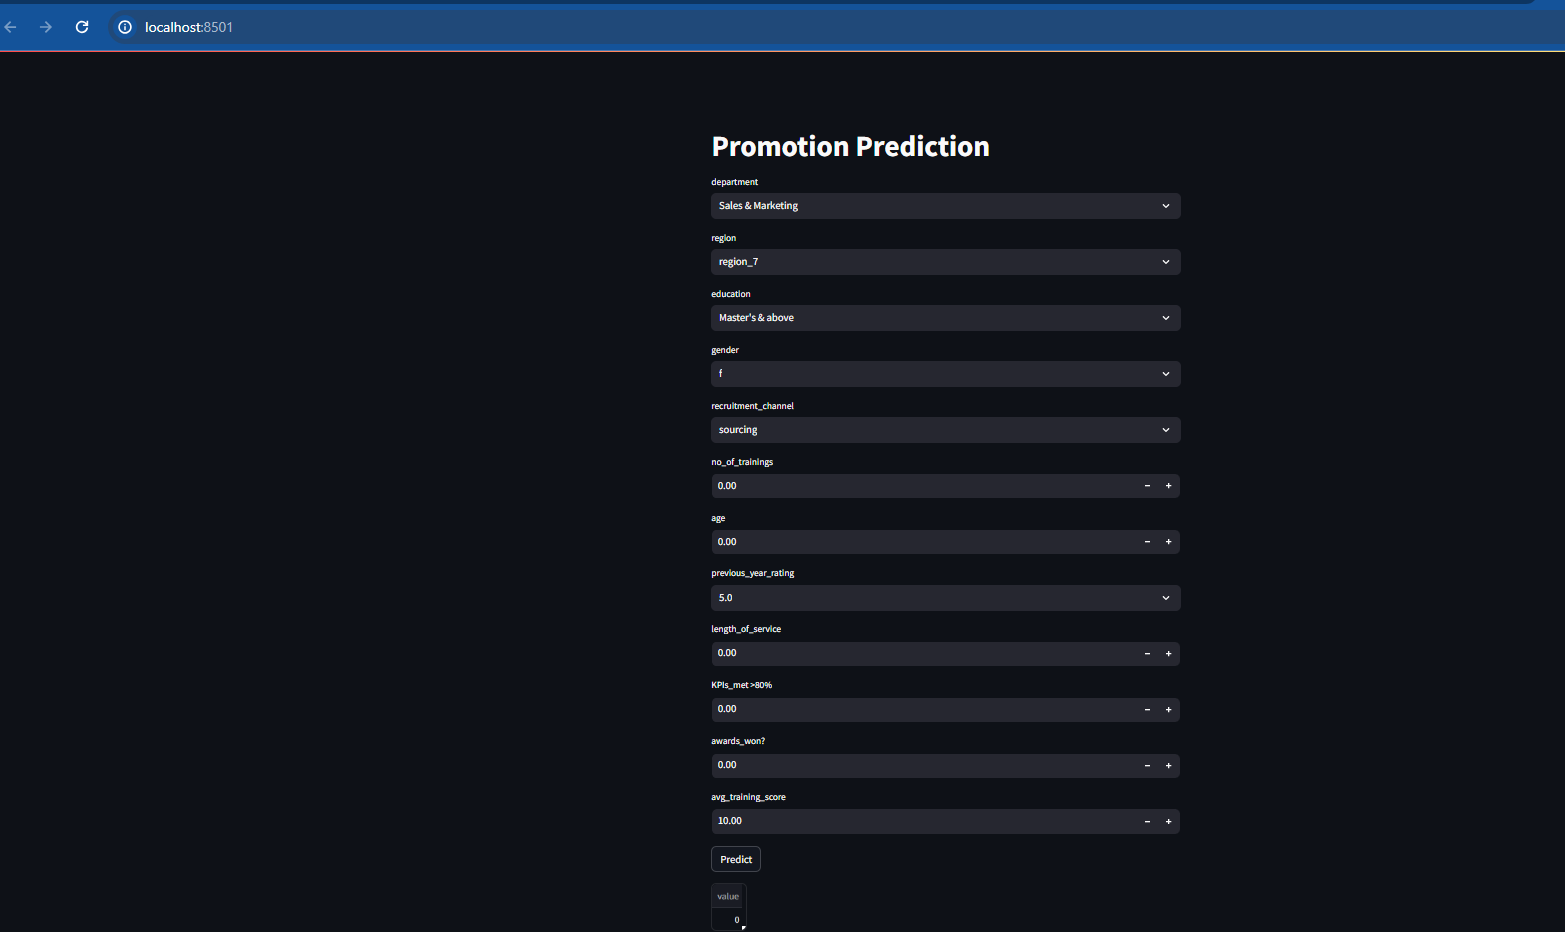